In [67]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

%matplotlib inline

In [111]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


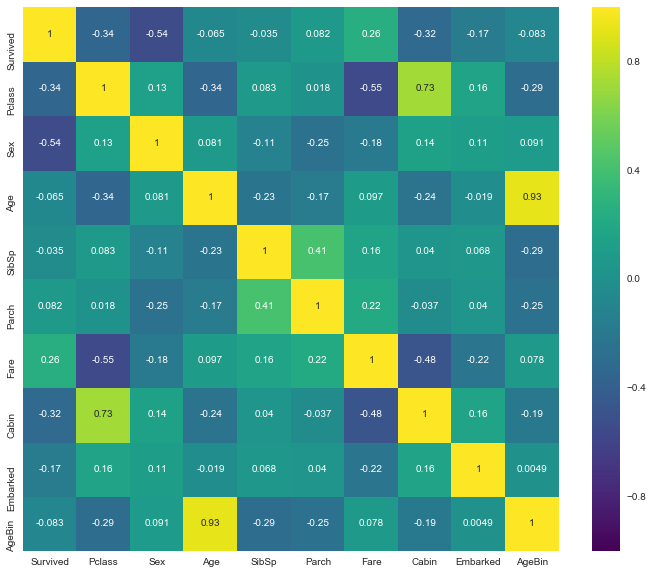

In [117]:
# Preprocess
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
full_data = [train, test]

# Sex
for data in full_data:
    le_sex = LabelEncoder()
    data['Sex'] = le_sex.fit_transform(data['Sex'])    

# Embarked
for data in full_data:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

# Cabin ひとまずNaNとそれ以外で分ける
for data in full_data:
    data['Cabin'] = data['Cabin'].isnull().astype(int)
    
# Age ビンニング
bins = [ 0, 4, 12, 18, 30, 50, 65, 100]
age_index = (1,2,3,4,5,6,7)
for data in full_data:
    data['Age'] = data['Age'].fillna(data['Age'].median())
    data['AgeBin'] = pd.cut(data['Age'], bins, labels=age_index).astype(int)

# Feature Correlation
plt.figure(figsize=(12,10))
sns.heatmap(train.ix[:,1:].corr(), cmap=plt.cm.viridis, annot=True)

In [144]:
feature_cols = ['Pclass', 'Sex', 'Fare','Cabin', 'Embarked', 'AgeBin']

train_X = train[feature_cols].as_matrix()
train_Y = train['Survived']
lgb_train = lgb.Dataset(train_X, train_Y)

test_X = test[feature_cols].as_matrix()

In [145]:
gbm = lgb.LGBMClassifier().fit(train_X, train_Y)
pred_Y = gbm.predict(test_X)
submission = pd.DataFrame({ 'PassengerId': test['PassengerId'], 'Survived': pred_Y })
submission.to_csv("submission.csv", index=False)

In [147]:
# gt = pd.read_csv('./input/svd.csv')
# np.sum(gt['Survived'] == pred_Y) / len(gt)

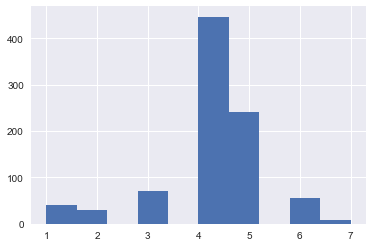

In [151]:
train['AgeBin'].hist()